In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cwru-bearing-datasets/CWRU_48k_load_1_CNN_data.npz
/kaggle/input/cwru-bearing-datasets/feature_time_48k_2048_load_1.csv
/kaggle/input/cwru-bearing-datasets/raw/IR021_1_214.mat
/kaggle/input/cwru-bearing-datasets/raw/B014_1_190.mat
/kaggle/input/cwru-bearing-datasets/raw/OR007_6_1_136.mat
/kaggle/input/cwru-bearing-datasets/raw/OR014_6_1_202.mat
/kaggle/input/cwru-bearing-datasets/raw/B007_1_123.mat
/kaggle/input/cwru-bearing-datasets/raw/IR007_1_110.mat
/kaggle/input/cwru-bearing-datasets/raw/B021_1_227.mat
/kaggle/input/cwru-bearing-datasets/raw/Time_Normal_1_098.mat
/kaggle/input/cwru-bearing-datasets/raw/OR021_6_1_239.mat
/kaggle/input/cwru-bearing-datasets/raw/IR014_1_175.mat


## Fault type identification
There are 10 types of faults, linked to each bearing deffect:
*   **Ball_007_1**: Ball defect (0.007 inch)
*   **Ball_014_1**: Ball defect (0.014 inch)
*   **Ball_021_1**: Ball defect (0.021 inch)
*   **IR_007_1**:   Inner race fault (0.007 inch)
*   **IR_014_1**:   Inner race fault (0.014 inch)
*   **IR_021_1**:   Inner race fault (0.021 inch)
*   **Normal_1**:   Normal
* **OR_007_6_1**:   Outer race fault (0.007 inch, data collected from 6 O'clock position)
* **OR_014_6_1**:   Outer race fault (0.014 inch, 6 O'clock)
* **OR_021_6_1**:   Outer race fault (0.021 inch, 6 O'clock)

## Get the data
The file we will read is the result of preprocessing the raw data files (folder `/kaggle/input/cwru-bearing-datasets/raw/`).

Time series segments contains 2048 points each. Given that the sampling frequency is 48kHz each time serie covers 0.04 seconds.

In [2]:
data_time = pd.read_csv("../input/cwru-bearing-datasets/feature_time_48k_2048_load_1.csv")
data_time.head()

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,Ball_007_1
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,Ball_007_1
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,Ball_007_1
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,Ball_007_1
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,Ball_007_1


## Encode fault types with numbers

In [3]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
data_time["fault_code"] = ord_enc.fit_transform(data_time[["fault"]])
data_time[["fault", "fault_code"]]

,fault,fault_code
0,Ball_007_1,0.0
1,Ball_007_1,0.0
2,Ball_007_1,0.0
3,Ball_007_1,0.0
4,Ball_007_1,0.0
...,...,...
2295,Normal_1,6.0
2296,Normal_1,6.0
2297,Normal_1,6.0
2298,Normal_1,6.0


In [4]:
# List labels of bearing deffects
data_time.fault_code.unique() # Equivalent: data_time['fault_code'].unique()

array([0., 1., 2., 3., 4., 5., 7., 8., 9., 6.])

In [5]:
# How many data points are there for each defect type?
data_time[['fault_code', 'fault']].value_counts()

fault_code  fault     
0.0         Ball_007_1    230
1.0         Ball_014_1    230
2.0         Ball_021_1    230
3.0         IR_007_1      230
4.0         IR_014_1      230
5.0         IR_021_1      230
6.0         Normal_1      230
7.0         OR_007_6_1    230
8.0         OR_014_6_1    230
9.0         OR_021_6_1    230
dtype: int64

In [6]:
# View some rows of the time serie for 'Ball_007_1' defect
data_time[data_time['fault'] == "Ball_007_1"]

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault,fault_code
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,Ball_007_1,0.0
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,Ball_007_1,0.0
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,Ball_007_1,0.0
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,Ball_007_1,0.0
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,Ball_007_1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
225,0.49692,-0.42787,0.018134,0.150290,0.151343,0.007713,-0.056754,3.283394,8.345722,Ball_007_1,0.0
226,0.63920,-0.52550,0.019247,0.161945,0.163045,0.005977,0.056390,3.920384,8.471037,Ball_007_1,0.0
227,0.43872,-0.38907,0.018747,0.131881,0.133175,-0.047987,-0.133409,3.294305,7.103795,Ball_007_1,0.0
228,0.49254,-0.54240,0.018965,0.152193,0.153333,-0.027618,0.290199,3.212226,8.084990,Ball_007_1,0.0


# Exploratory data analysis (EDA)

In [7]:
# Dataframe keeps only the labeled column (with an ordinal number)
data_time_labeled = data_time.drop('fault', 1)

## Correlation matrix

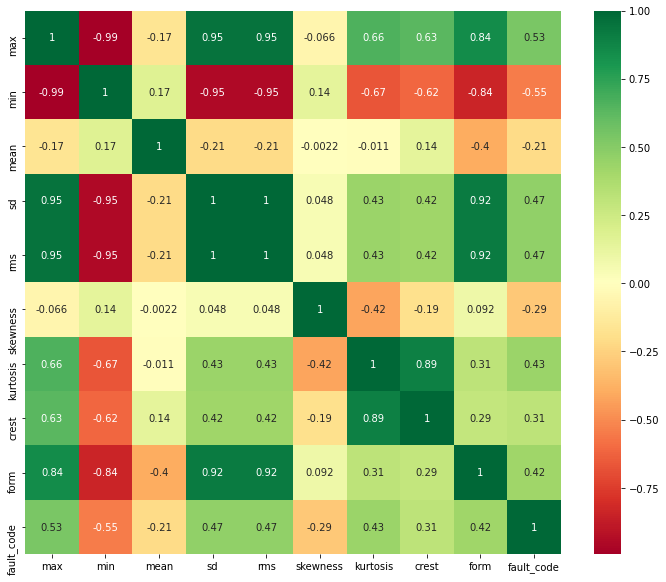

In [8]:
rcParams['figure.figsize'] = 12, 10
sns.heatmap(data_time_labeled.corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
plt.show()

## 1st task: Which faults are better classified with the accelerometer signal


In [9]:
# Split bearing defects according to their location
ball_defects = ['Normal_1','Ball_007_1','Ball_014_1','Ball_021_1']
IR_defects =   ['Normal_1','IR_007_1','IR_014_1','IR_021_1']
OR_defects =  ['Normal_1','OR_007_6_1','OR_014_6_1','OR_021_6_1']

In [10]:
# Split features in two groups for better visualization
features_basic_subset =    data_time[['max','min','mean','sd','rms', 'fault']]
features_advanced_subset = data_time[['skewness','kurtosis','crest','form', 'fault']]

In [11]:
# Filter rows for the selected list of defects
defect_subset = features_basic_subset

ball_defects_data = defect_subset.loc[defect_subset['fault'].isin(ball_defects)]
IR_defects_data =   defect_subset.loc[defect_subset['fault'].isin(IR_defects)]
OR_defects_data =   defect_subset.loc[defect_subset['fault'].isin(OR_defects)]

ball_defects_data['fault'].value_counts()

Ball_021_1    230
Normal_1      230
Ball_007_1    230
Ball_014_1    230
Name: fault, dtype: int64

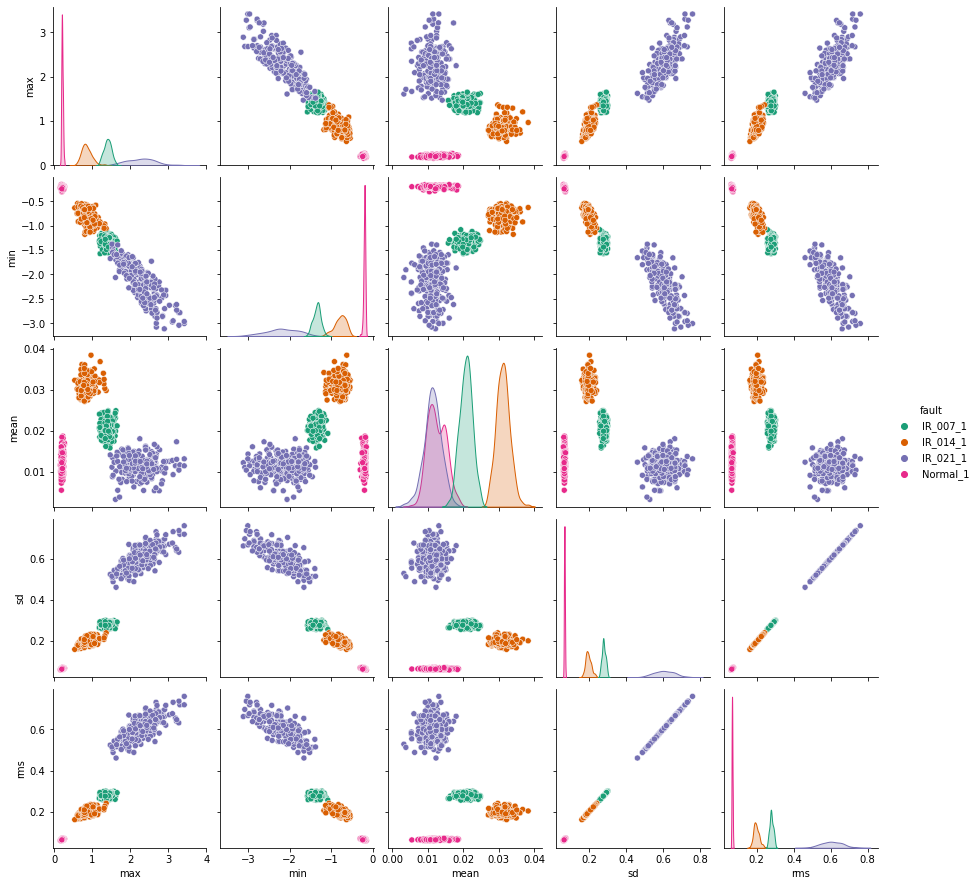

In [12]:
rcParams['figure.figsize'] = 6, 5
sns.pairplot(IR_defects_data,hue='fault',palette='Dark2')

## 2nd task: Which features are more relevant for the fault identification
Select a group of columns in **data_time** dataframe, including the defect label (column `fault`). Then explore how the selected features are able to discriminate the fault type. 

In [13]:
# You can take any combination of features. Here it's selected the advanced list for demonstration purposes
#defect_subset = features_basic_subset OR features_advanced_subset
# And this would be the best set looking at the correlation matrix
features_custom_subset = data_time[['max','mean','kurtosis','crest', 'form','fault']]
defect_subset = features_custom_subset

In [14]:
# Filter rows for the selected list of defects
ball_defects_data = defect_subset.loc[defect_subset['fault'].isin(ball_defects)]
IR_defects_data =   defect_subset.loc[defect_subset['fault'].isin(IR_defects)]
OR_defects_data =   defect_subset.loc[defect_subset['fault'].isin(OR_defects)]

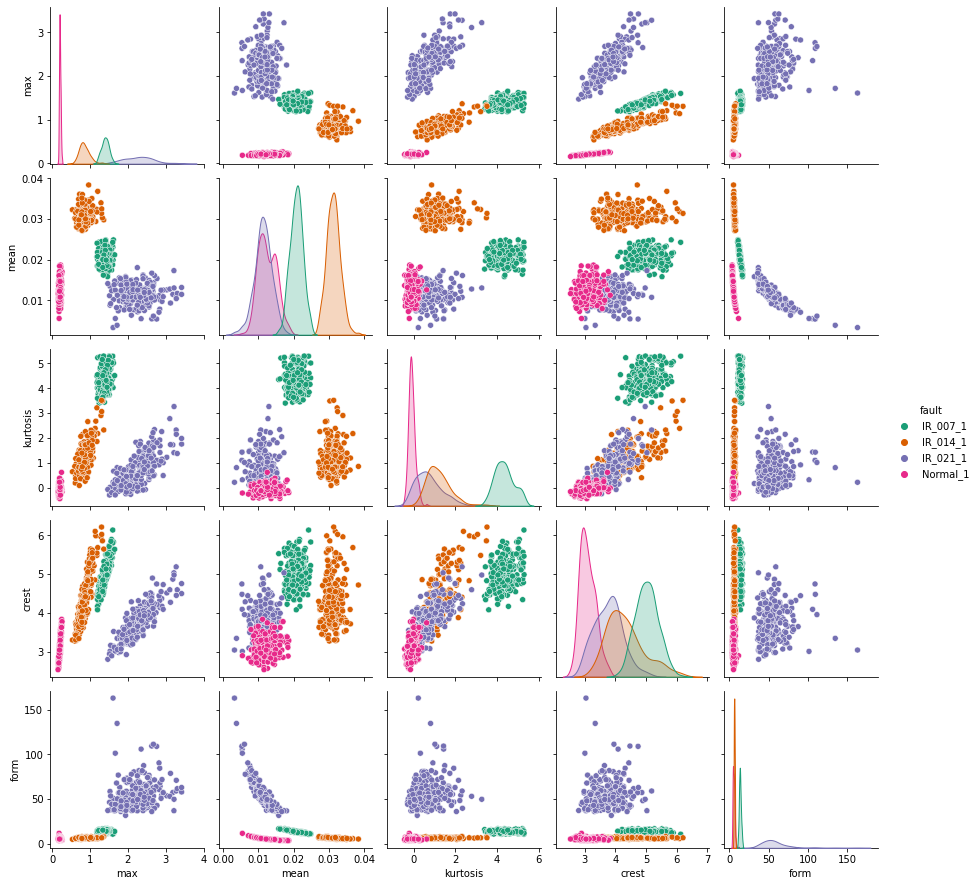

In [15]:
rcParams['figure.figsize'] = 8, 6
sns.pairplot(IR_defects_data,hue='fault',palette='Dark2')